### For existing *_segment.csv files: write a script to update to new standard:
- [x] Read file: *_segment.csv
- [x] Find all patch_flag == 1 segments
- [x] Find min and values of patch_file_name for each of these segments
- [x] If min patch_file_name == 0 do not update
- [x] If min patch_file_name == 1 decrement all patch_file_name values by 1 so that they now start at 0
- [x] For all segments with patch_flag != 1 set patch_file_name to -1
- [x] Write file: *_segment.csv
- [x] Run this on all *_segment.csv files in celeri/data/segment

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget
%config InlineBackend.figure_format = "retina"

In [5]:
file_name = "western_north_america_segment.csv"
file_name = "japan_segment_new.csv"
file_name = "emed0035_segment.csv"
file_name = "japan_segment.csv"
file_name = "global_segment.csv"

segment = pd.read_csv(file_name)
lon_range = (225, 250)
lat_range = (25, 55)
segment["centroid_lon"] = 0.5 * (segment.lon1 + segment.lon2)
segment["centroid_lat"] = 0.5 * (segment.lat1 + segment.lat2)


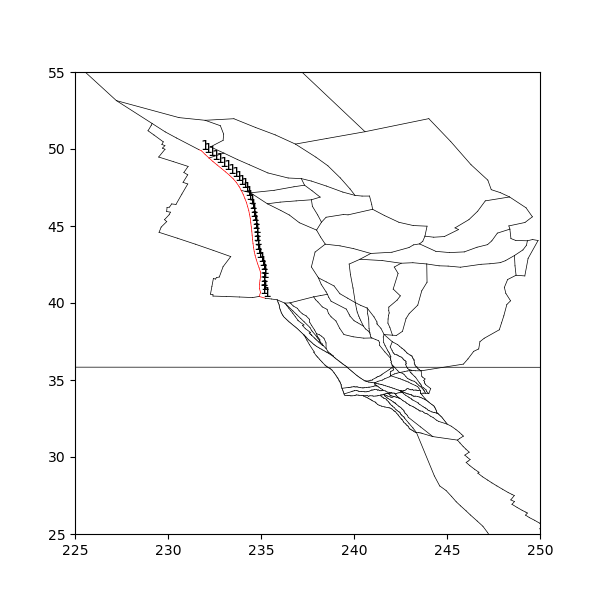

Decrementing patch_file_names so that the minimum value is 0


In [6]:
plt.figure(figsize=(6, 6))

for i in range(len(segment)):
    if segment.patch_flag[i] == 1:
        plt.plot(
            [segment.lon1[i], segment.lon2[i]],
            [segment.lat1[i], segment.lat2[i]],
            "-r",
            linewidth=0.5,
        )
        plt.text(
            segment.centroid_lon[i],
            segment.centroid_lat[i],
            str(segment.patch_flag[i]),
            clip_on=True,
        )
    else:
        plt.plot(
            [segment.lon1[i], segment.lon2[i]],
            [segment.lat1[i], segment.lat2[i]],
            "-k",
            linewidth=0.5,
        )
plt.xlim([lon_range[0], lon_range[1]])
plt.ylim([lat_range[0], lat_range[1]])
plt.show()


active_patch_flag_idx = np.where(segment.patch_flag == 1)[0]
inactive_patch_flag_idx = np.where(segment.patch_flag == 0)[0]
active_patch_file_names = segment.patch_file_name.values[active_patch_flag_idx]
min_patch_file_name = active_patch_file_names.min()
max_patch_file_name = active_patch_file_names.max()

if min_patch_file_name == 1:
    print("Decrementing patch_file_names so that the minimum value is 0")
    updated_active_patch_file_names = active_patch_file_names - 1
    segment.patch_file_name.values[
        active_patch_flag_idx
    ] = updated_active_patch_file_names

segment.patch_file_name.values[inactive_patch_flag_idx] = -1
file_name_parts = os.path.splitext(file_name)
output_file_name = f"{file_name_parts[0]}_updated_patch_file_name{file_name_parts[1]}"
segment.to_csv(output_file_name)
